In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [39]:
CRV=pd.read_excel('./Scrapes/CR-V.xlsx')
Outback=pd.read_excel('./Scrapes/Outback.xlsx')
Pilot=pd.read_excel('./Scrapes/Pilot.xlsx')
Rogue=pd.read_excel('./Scrapes/Rogue.xlsx')
Crosstrek=pd.read_excel('./Scrapes/Crosstrek.xlsx')
RAV4=pd.read_excel('./Scrapes/RAV4.xlsx')

In [40]:
# Drop the 'Unnamed: 0' column
CRV = CRV.drop('Unnamed: 0', axis=1)
Outback = Outback.drop('Unnamed: 0', axis=1)
Pilot = Pilot.drop('Unnamed: 0', axis=1)
Rogue = Rogue.drop('Unnamed: 0', axis=1)
Crosstrek = Crosstrek.drop('Unnamed: 0', axis=1)
RAV4 = RAV4.drop('Unnamed: 0', axis=1)

In [41]:
Used_DF = pd.concat([CRV, Outback, Pilot, Rogue, Crosstrek, RAV4], axis=0, ignore_index=True)
print(Used_DF)

        Year Manufacturer        Model     Trim  Mileage (mi) Status  \
0     2021.0        Honda         CR-V       EX       59806.0   Used   
1     2014.0        Honda         CR-V       LX       99396.0   Used   
2     2008.0        Honda         CR-V       EX      163345.0   Used   
3     2017.0        Honda         CR-V     EX-L      173049.0   Used   
4     2017.0        Honda         CR-V     EX-L       31665.0   Used   
...      ...          ...          ...      ...           ...    ...   
9432  2023.0       Toyota         RAV4      XLE       40082.0   Used   
9433  2023.0       Toyota         RAV4       LE       18212.0   Used   
9434  2022.0       Toyota  RAV4 Hybrid      XLE       45397.0   Used   
9435  2021.0       Toyota  RAV4 Hybrid  Limited       24854.0   Used   
9436  2019.0       Toyota  RAV4 Hybrid       LE       75502.0   Used   

      Price (USD)                                             Dealer  \
0         27602.0                      Zeigler Nissan of Orland

In [42]:
Used_DF.head()

,Year,Manufacturer,Model,Trim,Mileage (mi),Status,Price (USD),Dealer,City,URL
0,2021.0,Honda,CR-V,EX,59806.0,Used,27602.0,Zeigler Nissan of Orland Park,"Orland Park, IL",/vehicledetail/8acfc917-c94c-45e0-a513-9981ba0...
1,2014.0,Honda,CR-V,LX,99396.0,Used,13295.0,Auto House of Bloomington,"Bloomington, IL (38 mi.)",/vehicledetail/bfb30a67-a596-4de9-b359-6813c39...
2,2008.0,Honda,CR-V,EX,163345.0,Used,6995.0,Auto House of Bloomington,"Bloomington, IL (38 mi.)",/vehicledetail/b01ef623-50ee-4a81-8968-9047ba1...
3,2017.0,Honda,CR-V,EX-L,173049.0,Used,16066.0,Yemm Chevrolet Buick GMC,"Galesburg, IL (45 mi.)",/vehicledetail/721879f7-f75a-41de-8243-f3245cf...
4,2017.0,Honda,CR-V,EX-L,31665.0,Used,23998.0,CarMax Austin North - Offering Express Pickup ...,NaN,/vehicledetail/8a0d3898-e67d-4bfd-b310-09bbdef...


In [43]:
# Summary of DF numerical categories
print(Used_DF.describe())

              Year   Mileage (mi)    Price (USD)
count  9384.000000    4363.000000    9036.000000
mean   2021.992540   58079.820766   31075.777556
std       3.600915   46333.726476   10865.900674
min    1996.000000       0.000000    1695.000000
25%    2021.000000   24333.500000   25297.000000
50%    2024.000000   46721.000000   32319.000000
75%    2024.000000   81930.500000   37123.500000
max    2025.000000  705010.000000  471481.000000


In [44]:
# Summary of categorical columns
Used_DF.describe(include=['O'])

,Manufacturer,Model,Trim,Status,Dealer,City,URL
count,9384,9384,9343,9437,9414,9340,9437
unique,4,8,86,6,775,466,9437
top,Honda,Rogue,SV,New,McGrath Honda of St. Charles,"Countryside, IL (118 mi.)",/vehicledetail/8acfc917-c94c-45e0-a513-9981ba0...
freq,2869,2820,1645,5074,310,319,1


In [45]:
# Data Types and non-nulls
Used_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9437 entries, 0 to 9436
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          9384 non-null   float64
 1   Manufacturer  9384 non-null   object 
 2   Model         9384 non-null   object 
 3   Trim          9343 non-null   object 
 4   Mileage (mi)  4363 non-null   float64
 5   Status        9437 non-null   object 
 6   Price (USD)   9036 non-null   float64
 7   Dealer        9414 non-null   object 
 8   City          9340 non-null   object 
 9   URL           9437 non-null   object 
dtypes: float64(3), object(7)
memory usage: 737.4+ KB


In [46]:
# Check for missing values
Used_DF.isnull().sum()

Year              53
Manufacturer      53
Model             53
Trim              94
Mileage (mi)    5074
Status             0
Price (USD)      401
Dealer            23
City              97
URL                0
dtype: int64

In [47]:
# View rows where 'Year' is NaN
nan_rows = Used_DF[Used_DF['Year'].isna()]
print("Rows with NaN values in 'Year' column:")
print(nan_rows)

Rows with NaN values in 'Year' column:
      Year Manufacturer Model Trim  Mileage (mi)           Status  \
316    NaN          NaN   NaN  NaN       54140.0  Honda Certified   
507    NaN          NaN   NaN  NaN       36748.0  Honda Certified   
787    NaN          NaN   NaN  NaN       30760.0  Honda Certified   
812    NaN          NaN   NaN  NaN       35548.0  Honda Certified   
851    NaN          NaN   NaN  NaN       29770.0  Honda Certified   
876    NaN          NaN   NaN  NaN       30297.0  Honda Certified   
1113   NaN          NaN   NaN  NaN       17929.0  Honda Certified   
1182   NaN          NaN   NaN  NaN       36212.0  Honda Certified   
1271   NaN          NaN   NaN  NaN       11699.0  Honda Certified   
1273   NaN          NaN   NaN  NaN       38363.0  Honda Certified   
1343   NaN          NaN   NaN  NaN       53125.0  Honda Certified   
1344   NaN          NaN   NaN  NaN       46345.0  Honda Certified   
1345   NaN          NaN   NaN  NaN       18930.0  Honda Certifie

In [48]:
# Check and handle missing values if any
Used_DF.dropna(inplace=True)

# Convert the 'Year' column to integers
Used_DF['Year'] = Used_DF['Year'].astype(int)
Used_DF['Mileage (mi)'] = Used_DF['Mileage (mi)'].astype(int)
Used_DF['Price (USD)'] = Used_DF['Price (USD)'].astype(float)

In [49]:
Used_DF
Used_DF.to_excel('CleanUsed.xlsx')

In [62]:
## Taking out Nissan's for another person
Rogue_DF = Used_DF[Used_DF['Manufacturer'] == 'Nissan'].copy()
Rogue_DF.head()
Rogue_DF.to_excel("UsedRogue.xlsx")

Data Analysis

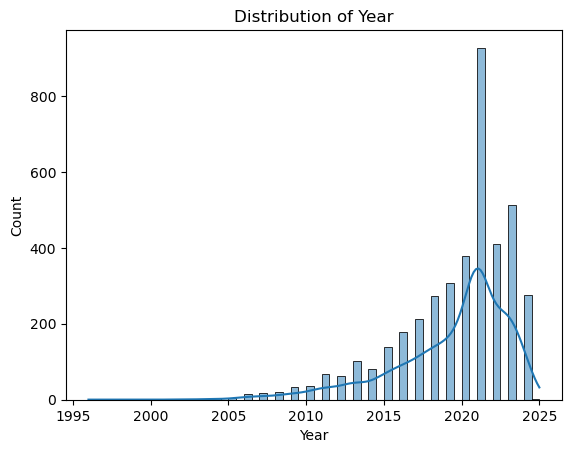

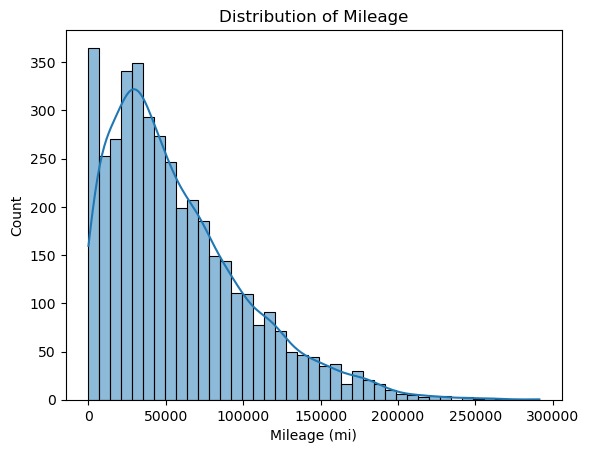

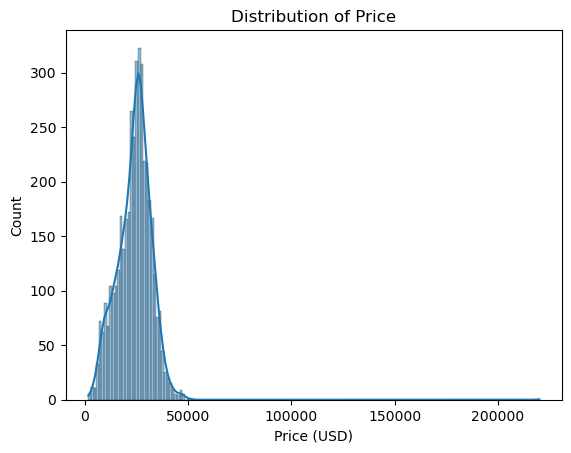

In [50]:
## Distribution of Numerical Categories
# Distribution of Year
sns.histplot(Used_DF['Year'], kde=True)
plt.title('Distribution of Year')
plt.show()

# Distribution of Mileage
sns.histplot(Used_DF['Mileage (mi)'], kde=True)
plt.title('Distribution of Mileage')
plt.show()

# Distribution of Price
sns.histplot(Used_DF['Price (USD)'], kde=True)
plt.title('Distribution of Price')
plt.show()

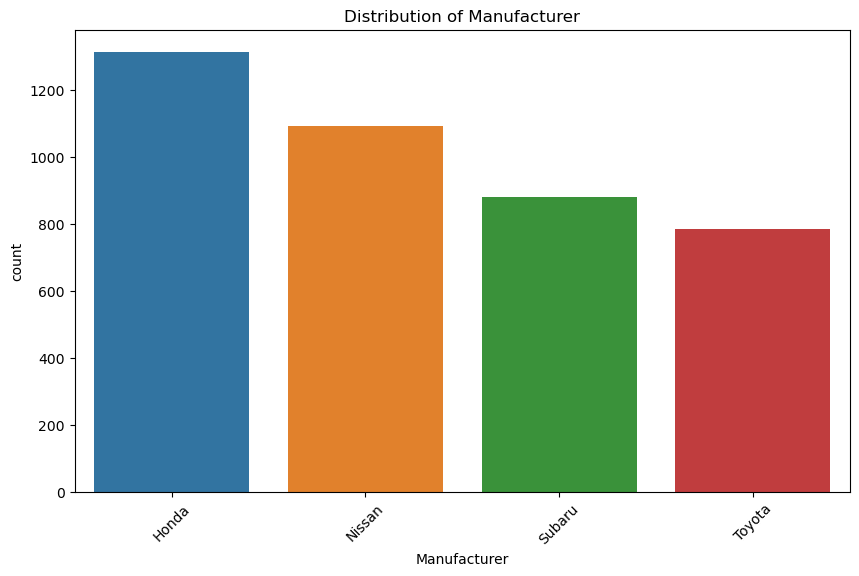

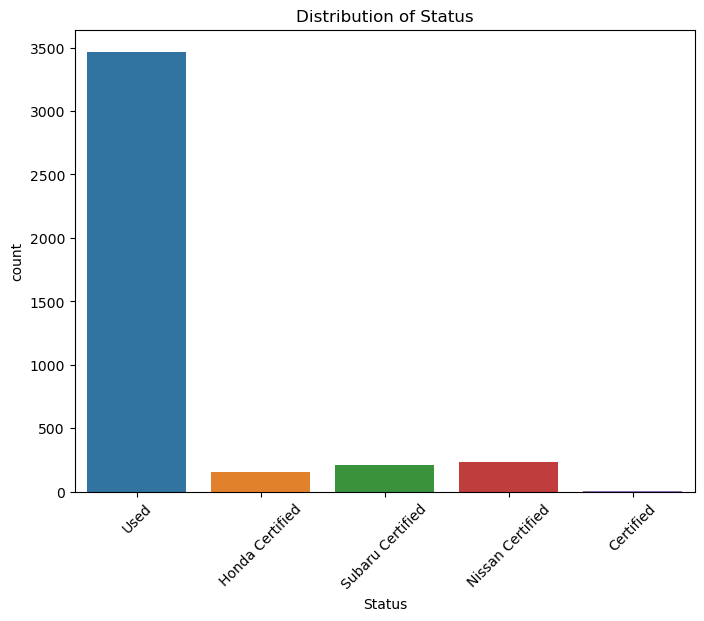

In [60]:
## Distribution of Categorical 
# Distribution of Manufacturer
plt.figure(figsize=(10, 6))
sns.countplot(data=Used_DF, x='Manufacturer', order=Used_DF['Manufacturer'].value_counts().index)
plt.title('Distribution of Manufacturer')
plt.xticks(rotation=45)
plt.show()

# Distribution of Status
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.countplot(data=Used_DF, x='Status')
plt.title('Distribution of Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

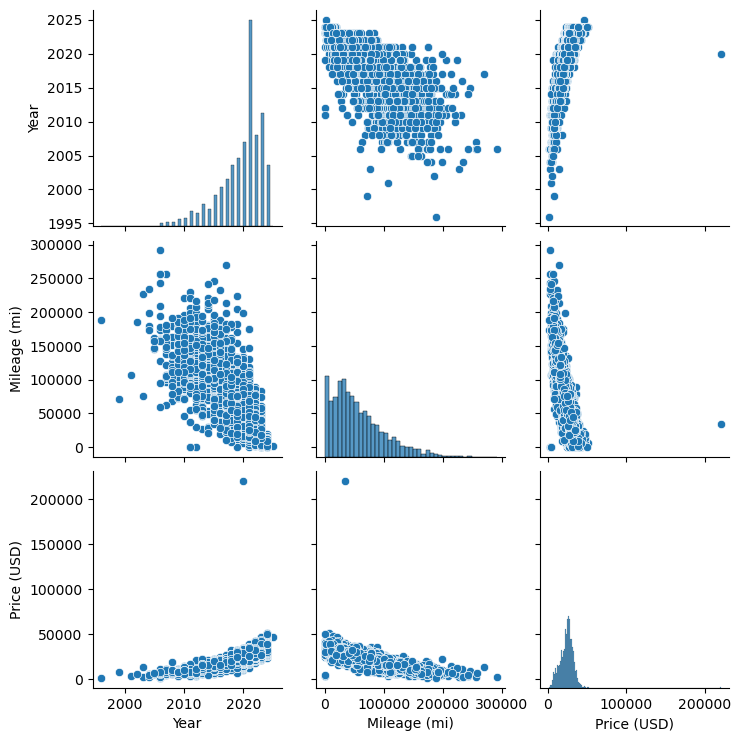

In [52]:
# Pairplot to see pairwise relationships
sns.pairplot(Used_DF[['Year', 'Mileage (mi)', 'Price (USD)']])
plt.show()

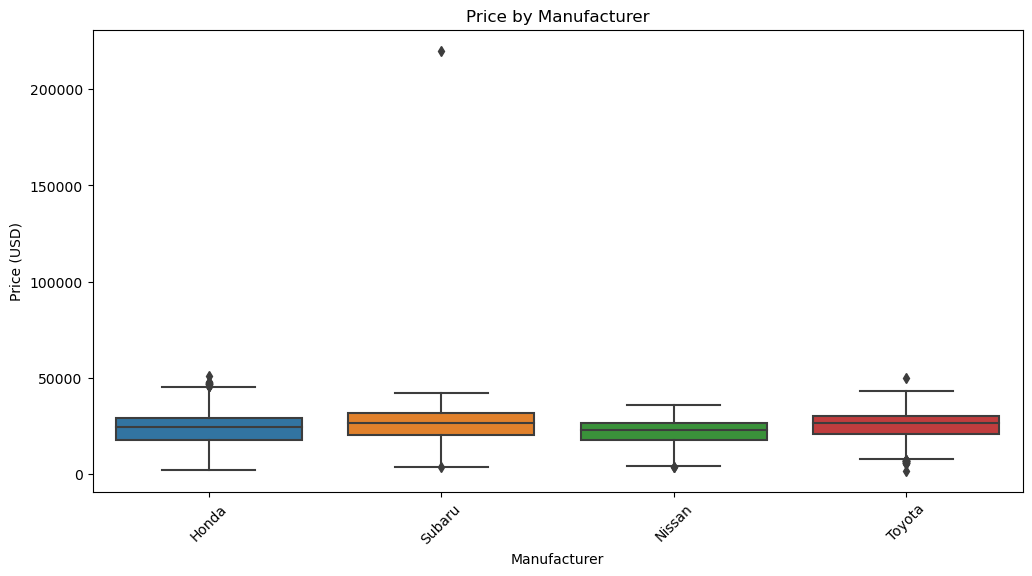

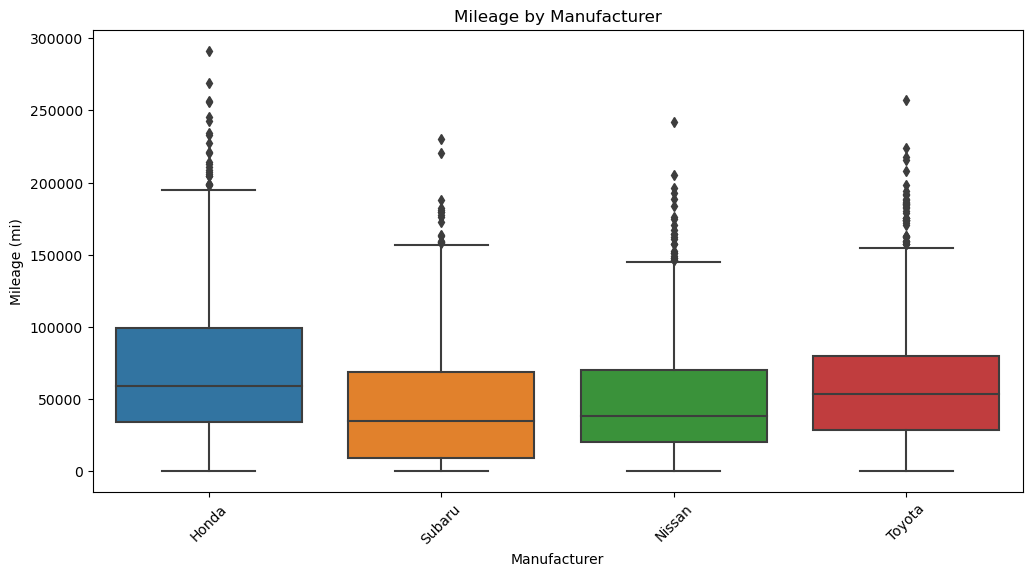

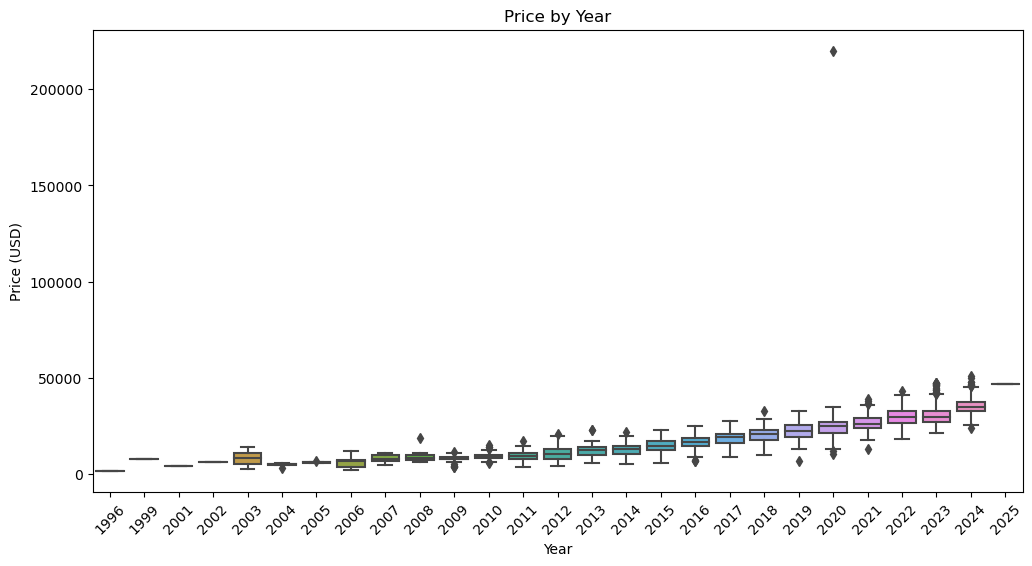

In [53]:
# Boxplot of Price by Manufacturer
plt.figure(figsize=(12, 6))
sns.boxplot(data=Used_DF, x='Manufacturer', y='Price (USD)')
plt.title('Price by Manufacturer')
plt.xticks(rotation=45)
plt.show()

# Boxplot of Mileage by Manufacturer
plt.figure(figsize=(12, 6))
sns.boxplot(data=Used_DF, x='Manufacturer', y='Mileage (mi)')
plt.title('Mileage by Manufacturer')
plt.xticks(rotation=45)
plt.show()

# Boxplot of Price by Year
plt.figure(figsize=(12, 6))
sns.boxplot(data=Used_DF, x='Year', y='Price (USD)')
plt.title('Price by Year')
plt.xticks(rotation=45)
plt.show()

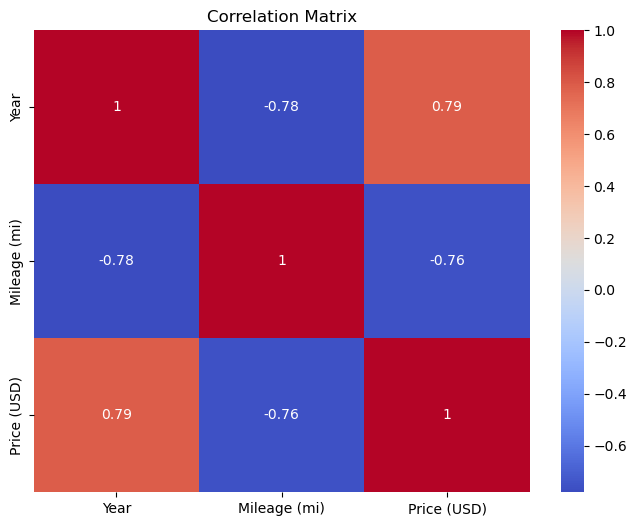

In [54]:
# Correlation matrix
corr_matrix = Used_DF[['Year', 'Mileage (mi)', 'Price (USD)']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

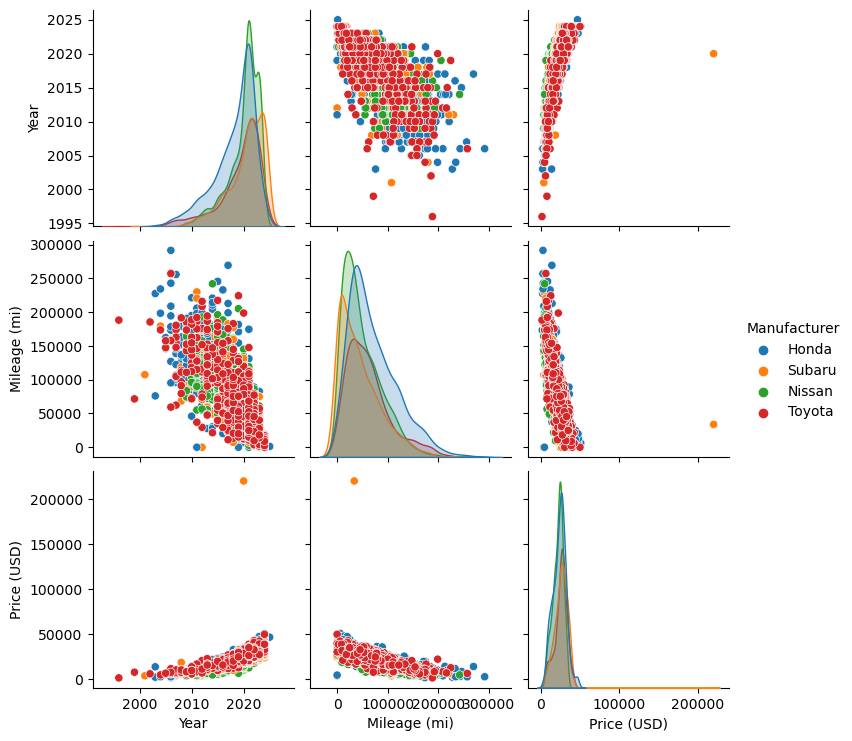

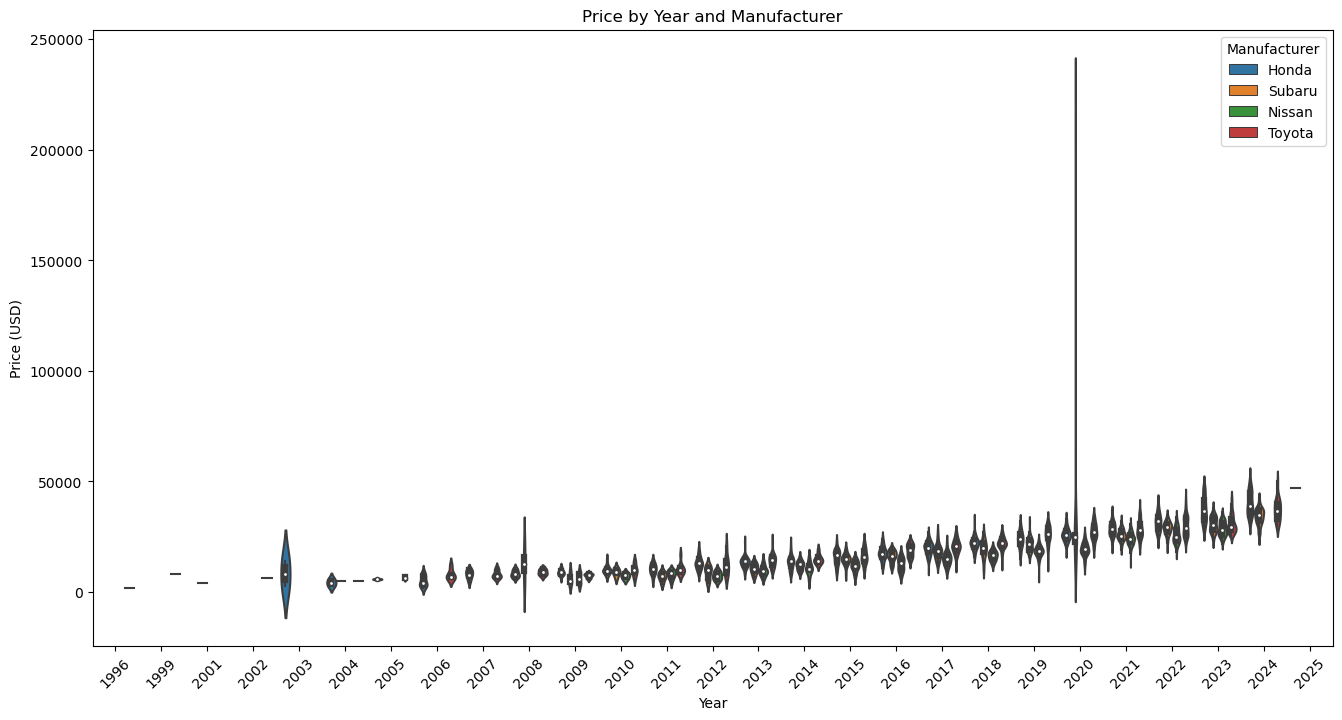

In [57]:
# Pairplot colored by Manufacturer
sns.pairplot(Used_DF, hue='Manufacturer', vars=['Year', 'Mileage (mi)', 'Price (USD)'])
plt.show()

plt.figure(figsize=(16, 8))
sns.violinplot(data=Used_DF, x='Year', y='Price (USD)', hue='Manufacturer')
plt.title('Price by Year and Manufacturer')
plt.xticks(rotation=45)
plt.show()



c:\Users\awsom\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


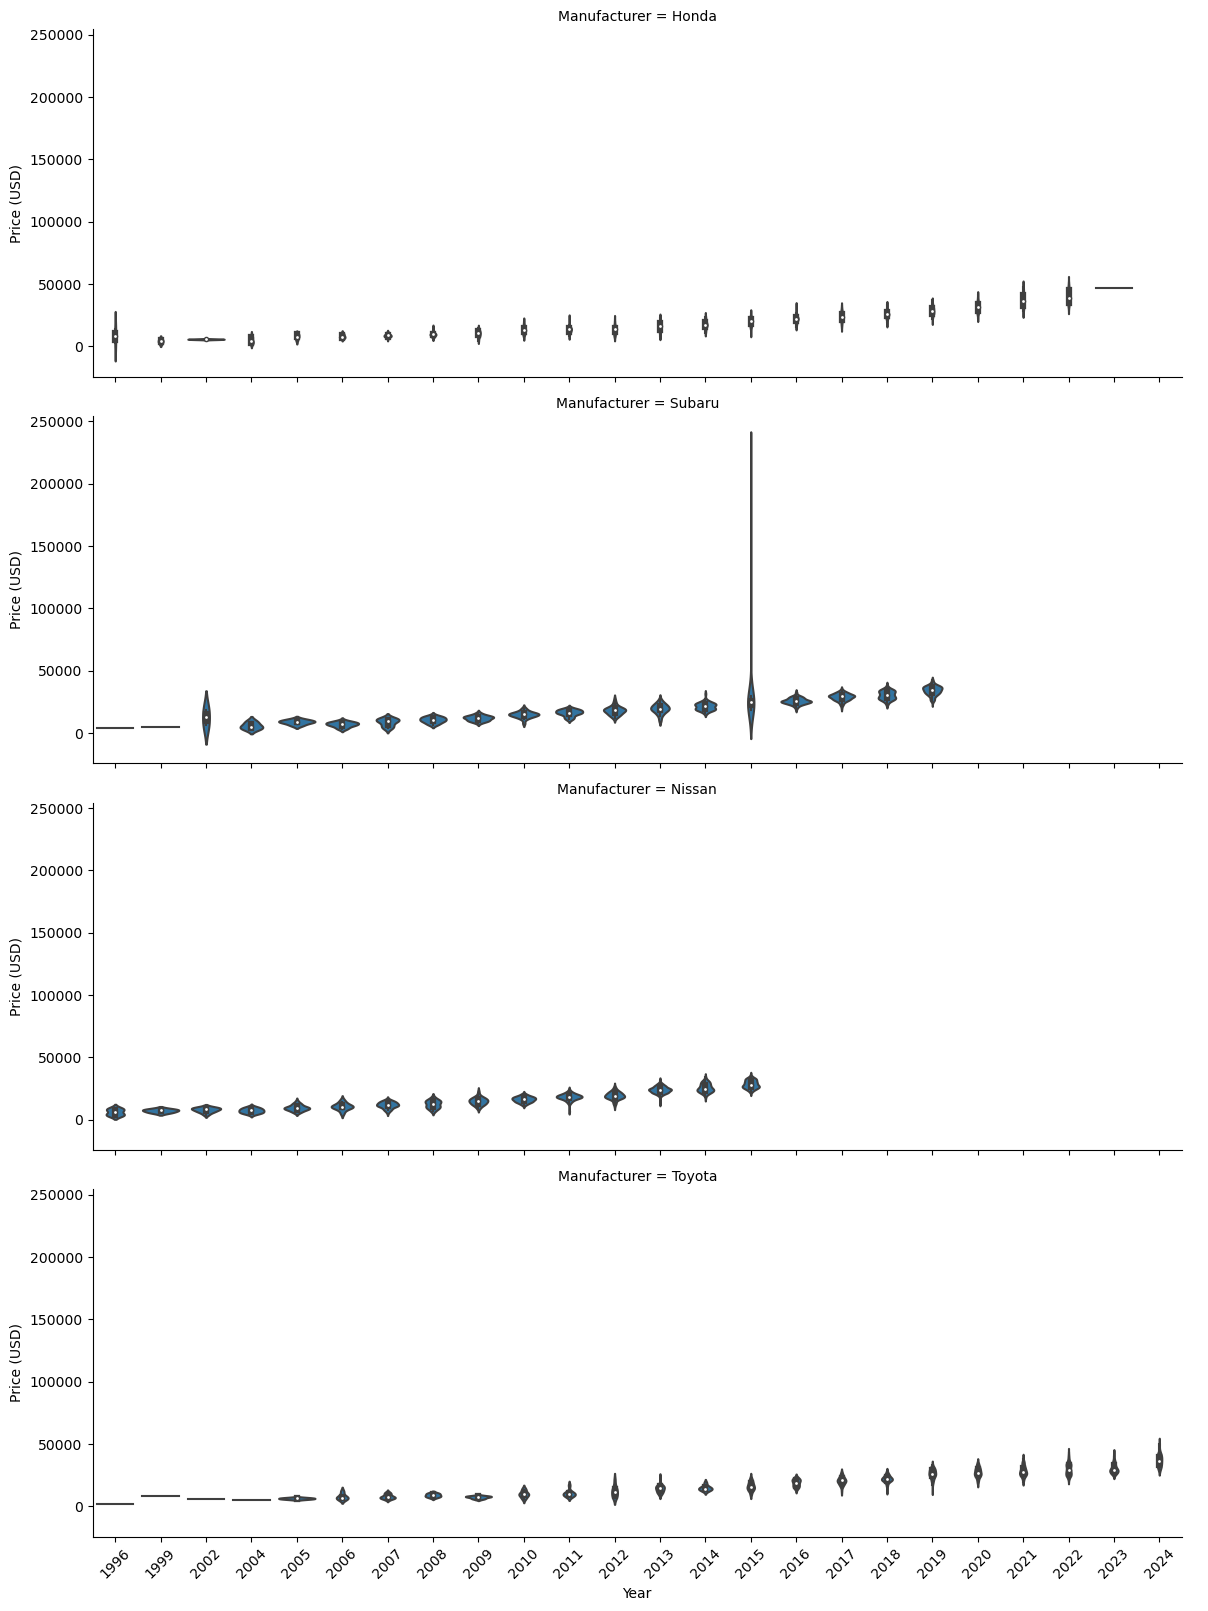

In [59]:
# FacetGrid for separate plots
g = sns.FacetGrid(Used_DF, col='Manufacturer', col_wrap=1, height=4, aspect=3)  # height controls the height of each subplot, aspect controls the aspect ratio
g.map(sns.violinplot, 'Year', 'Price (USD)')

# Rotate x-axis labels for better readability
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

g.add_legend()
plt.show()


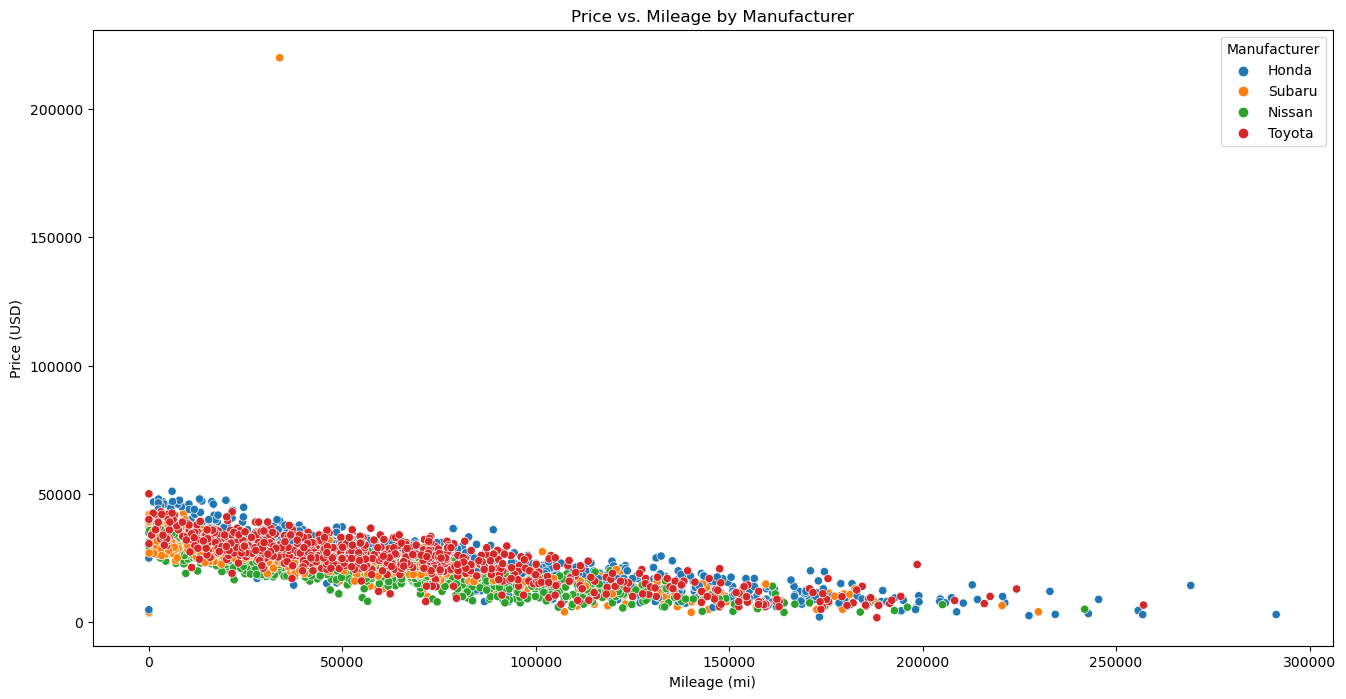

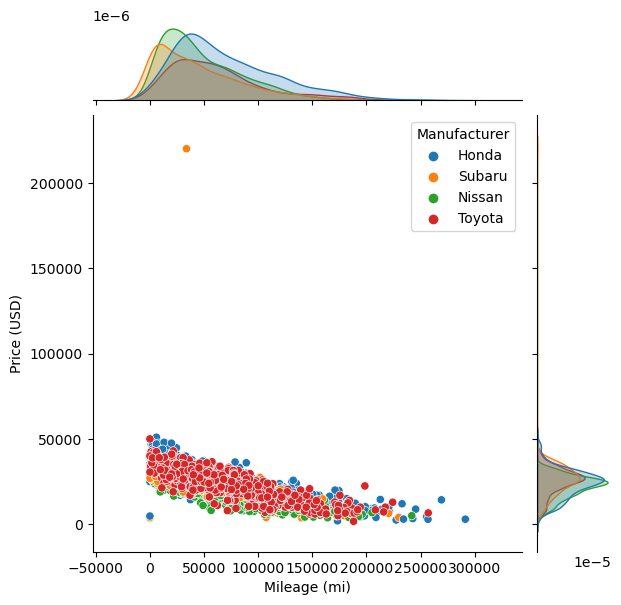

In [56]:
# Scatter Plot for Price vs. Mileage by Manufacturer
plt.figure(figsize=(16, 8))
sns.scatterplot(data=Used_DF, x='Mileage (mi)', y='Price (USD)', hue='Manufacturer')
plt.title('Price vs. Mileage by Manufacturer')
plt.show()

# Joint Plot for Price vs. Mileage
sns.jointplot(data=Used_DF, x='Mileage (mi)', y='Price (USD)', hue='Manufacturer', kind='scatter')
plt.show()